In [48]:
import pandas as pd 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 



In [152]:
# loading the data
file_path = r'D:\This PC\Documents\Data_Analysis\HUJI_course\projects_and_datasets\final_project\coffee_shop_sales_data\coffee_shop_sales.csv'
df = pd.read_csv(file_path)



# date & and time type convertion
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time 

# creating the revenue column
df['revenue'] = df['transaction_qty'] * df['unit_price']

## inspecting the data: 

### general inspection:

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  revenue           149116 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 13.7+ MB


In [51]:
# cheking if there are any missing data (Nulls)
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
revenue             0
dtype: int64

In [52]:
# checking for duplicate rows: 
print(f" number of duplicate rows: {df['transaction_id'].duplicated().sum()}")

 number of duplicate rows: 0


### quantity, prices and revenue: 

In [53]:
df[['transaction_qty', 'unit_price', 'revenue']].describe()

,transaction_qty,unit_price,revenue
count,149116.000000,149116.000000,149116.000000
mean,1.438276,3.382219,4.686367
std,0.542509,2.658723,4.227099
min,1.000000,0.800000,0.800000
25%,1.000000,2.500000,3.000000
50%,1.000000,3.000000,3.750000
75%,2.000000,3.750000,6.000000
max,8.000000,45.000000,360.000000


In [54]:
# checking if transaction quantity and unit price are ever 0 or negative: 
df.query('transaction_qty <= 0 or unit_price <= 0')[['transaction_id', 'unit_price']]

,transaction_id,unit_price


In [55]:
# checking which product is the one with max price 
df.query('unit_price == 45')[['product_id','product_category']]

,product_id,product_category
5187,8,Coffee beans
5879,8,Coffee beans
5944,8,Coffee beans
7626,8,Coffee beans
8452,8,Coffee beans
...,...,...
144743,8,Coffee beans
145411,8,Coffee beans
148573,8,Coffee beans
148702,8,Coffee beans


### date and time

In [56]:
# sampling the date and time columns:
df[['transaction_date', 'transaction_time']].head(5) 

,transaction_date,transaction_time
0,2023-01-01,07:06:11
1,2023-01-01,07:08:56
2,2023-01-01,07:14:04
3,2023-01-01,07:20:24
4,2023-01-01,07:22:41


In [147]:
print(f"Earlies transaction time: {df['transaction_time'].min()}")
print(f"Latest transaxtion time: {df['transaction_time'].max()}")
      

Earlies transaction time: 06:00:00
Latest transaxtion time: 20:59:32


In [ ]:
# creating a time range column with 1 hour intervals: 
hours = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour 

df['time_range'] = (
    hours.astype(str) + ' - ' + (hours + 1).astype(str) 
) 


0           7 - 8
1           7 - 8
2           7 - 8
3           7 - 8
4           7 - 8
           ...   
149111    20 - 21
149112    20 - 21
149113    20 - 21
149114    20 - 21
149115    20 - 21
Name: time_range, Length: 149116, dtype: object

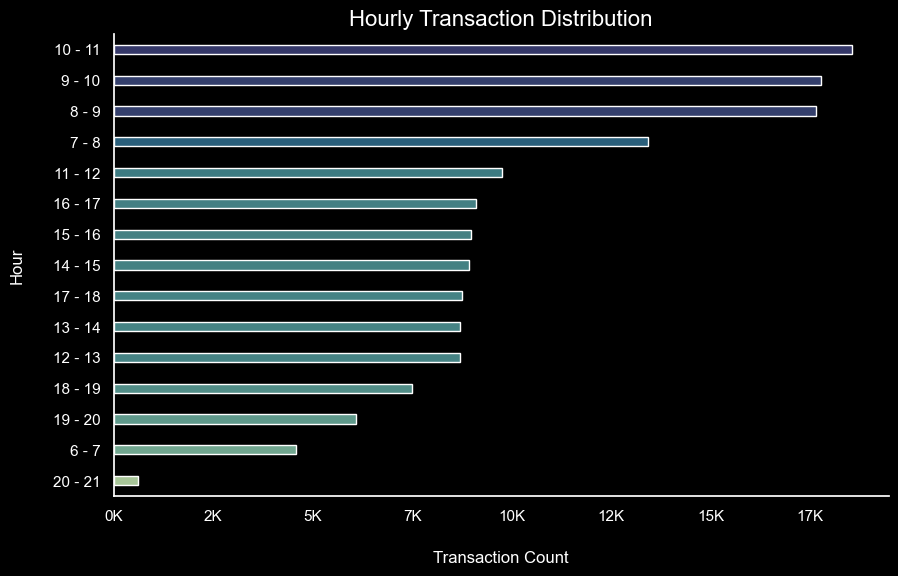

In [167]:
tran_per_hour = df['time_range'].value_counts().sort_values(ascending=False).to_frame()

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= tran_per_hour, x='count', y='time_range', hue='count', palette='crest', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.title('Hourly Transaction Distribution', fontsize= 16, color='white')
plt.xlabel('Transaction Count', fontsize=12, color='white', labelpad=20)
plt.ylabel('Hour', fontsize=12, color='white', labelpad=20)

plt.show()


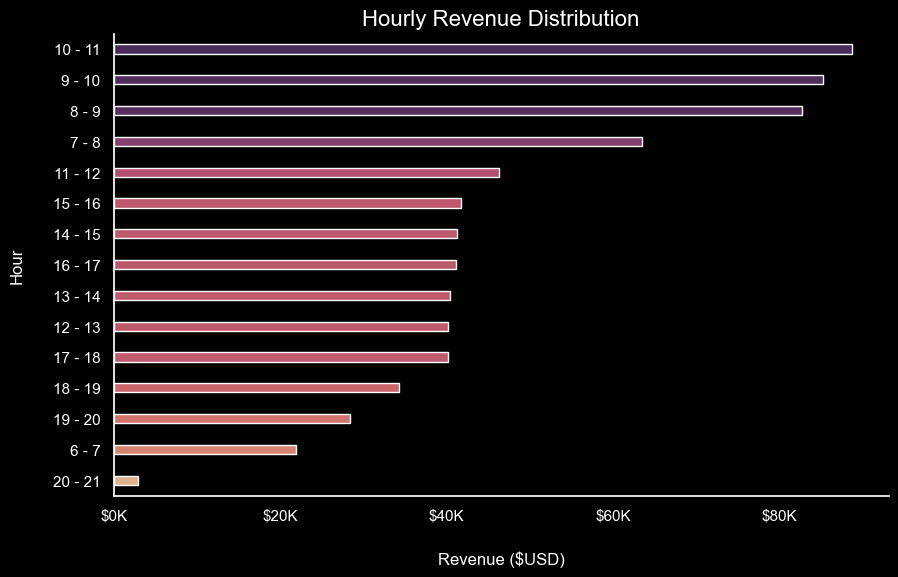

In [166]:
revenue_per_hour = df.groupby('time_range')['revenue'].sum().to_frame().sort_values(by='revenue', ascending=False)

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= revenue_per_hour, x='revenue', y='time_range', hue='revenue', palette='flare', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Hourly Revenue Distribution', fontsize= 16, color='white')
plt.xlabel('Revenue ($USD)', fontsize=12, color='white', labelpad=20)
plt.ylabel('Hour', fontsize=12, color='white', labelpad=20)

plt.show()


In [57]:
# checking the time report range of the data 
print(f"first day of the report period: {df['transaction_date'].min()}")
print(f"last day of the report period: {df['transaction_date'].max()}")
      


first day of the report period: 2023-01-01 00:00:00
last day of the report period: 2023-06-30 00:00:00


In [141]:
df['transaction_month'] = df['transaction_date'].dt.strftime('%b')

monthly_revenue = df.groupby('transaction_month')['revenue'].sum().reset_index()

# fixing the indexing to be chronological 
monthly_revenue['month_numeric'] = pd.to_datetime(monthly_revenue['transaction_month'], format='%b').dt.month 

monthly_revenue = monthly_revenue.sort_values(by='month_numeric')
monthly_revenue.set_index('transaction_month', inplace=True)

monthly_revenue.drop(columns='month_numeric', inplace=True)

monthly_revenue

,revenue
transaction_month,
Jan,81677.74
Feb,76145.19
Mar,98834.68
Apr,118941.08
May,156727.76
Jun,166485.88


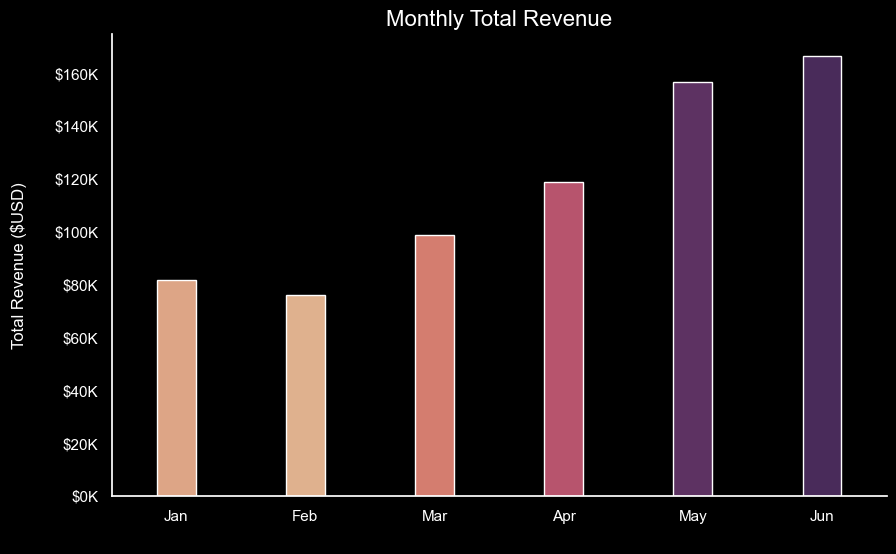

In [142]:


plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= monthly_revenue, x='transaction_month', y='revenue', hue='revenue', palette='flare', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')


plt.title('Monthly Total Revenue', fontsize= 16, color='white')
plt.ylabel('Total Revenue ($USD)', fontsize=12, color='white', labelpad=20)
plt.xlabel(' ')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.show()

### products and categories

In [58]:
# checking the unique product categories we have: 
print(f"number of unique product categories: {df['product_category'].nunique()}")
print(df['product_category'].unique())

number of unique product categories: 9
['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']


In [94]:
df.groupby('product_category')['transaction_qty'].sum()


product_category
Bakery                23214
Branded                 776
Coffee                89250
Coffee beans           1828
Drinking Chocolate    17457
Flavours              10511
Loose Tea              1210
Packaged Chocolate      487
Tea                   69737
Name: transaction_qty, dtype: int64

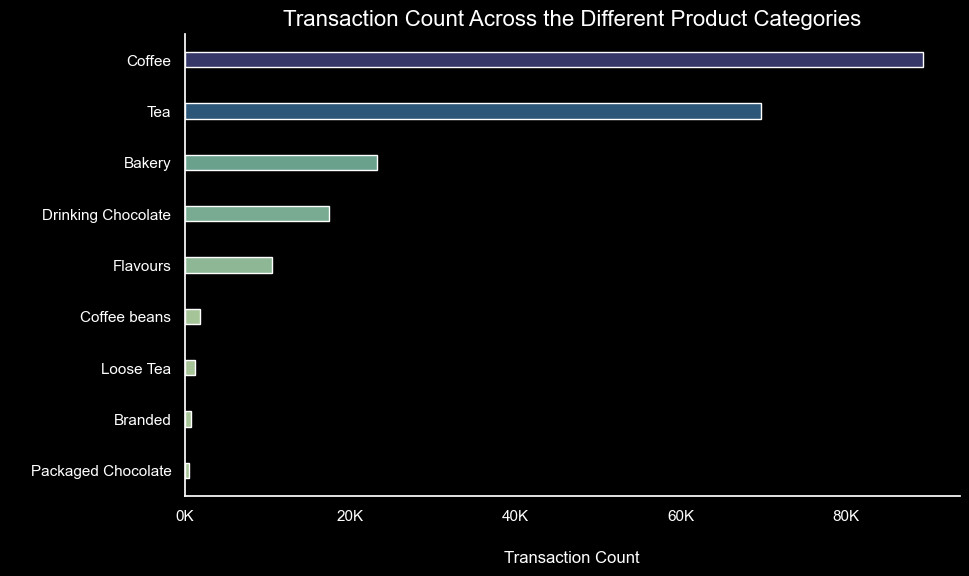

In [131]:
products_trans_count_plot = df.groupby('product_category')['transaction_qty'].sum().reset_index().sort_values(by= 'transaction_qty', ascending=False)

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= products_trans_count_plot, x='transaction_qty', y='product_category', hue='transaction_qty', palette='crest', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.title('Transaction Count Across the Different Product Categories', fontsize= 16, color='white')
plt.xlabel('Transaction Count', fontsize=12, color='white', labelpad=20)
plt.ylabel(' ')

plt.show()

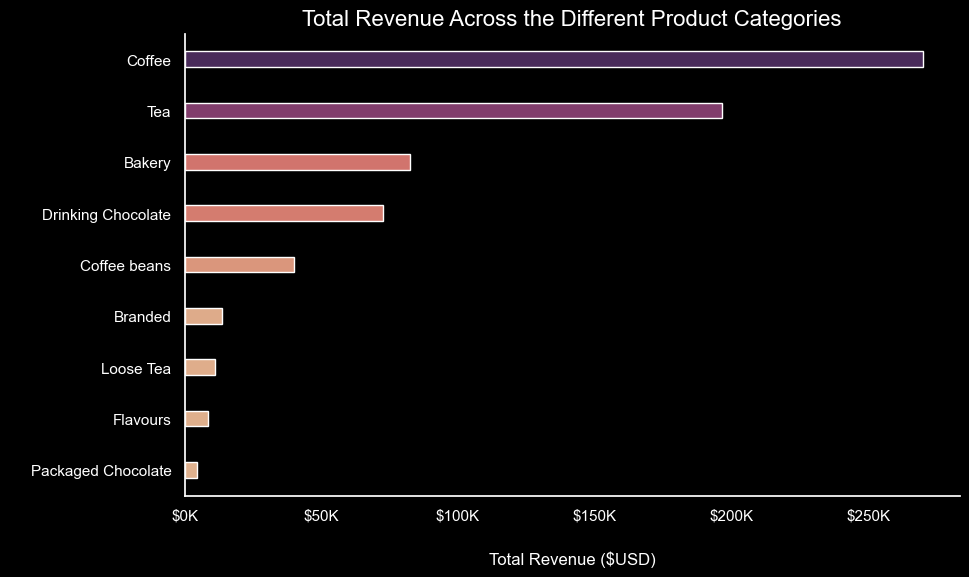

In [143]:
products_revenue_plot = df.groupby('product_category')['revenue'].sum().reset_index().sort_values(by= 'revenue', ascending=False)

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= products_revenue_plot, x='revenue', y='product_category', hue='revenue', palette='flare', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')


plt.title('Total Revenue Across the Different Product Categories', fontsize= 16, color='white')
plt.xlabel('Total Revenue ($USD)', fontsize=12, color='white', labelpad=20)
plt.ylabel(' ')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()

### stores and locations: 

In [59]:
# checking the distribution of transactions across the different store locations
df['store_location'].value_counts()

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

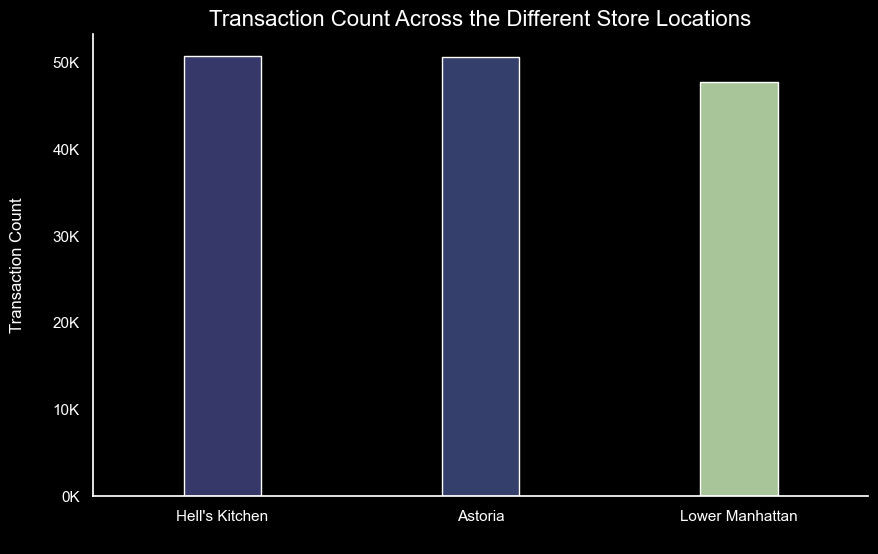

In [144]:
stores_trans_count_plot = df['store_location'].value_counts().reset_index()

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= stores_trans_count_plot, x='store_location', y='count', hue='count', palette='crest', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K'))

plt.title('Transaction Count Across the Different Store Locations', fontsize= 16, color='white')
plt.ylabel('Transaction Count', fontsize=12, color='white', labelpad=20)
plt.xlabel(' ')

plt.show()


In [76]:
# checking the revnue difference across the different stores: 
df.groupby('store_location')['revenue'].sum()

store_location
Astoria            232243.91
Hell's Kitchen     236511.17
Lower Manhattan    230057.25
Name: revenue, dtype: float64

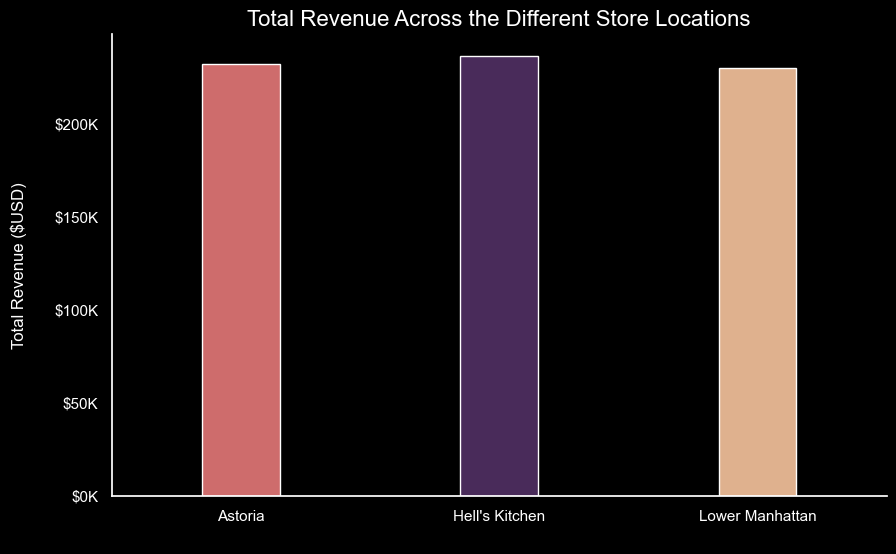

In [145]:
stores_revenue_plot = df.groupby('store_location')['revenue'].sum().reset_index() 

plt.figure(figsize=(10, 6))
sns.set_theme( style='dark')

sns.barplot(data= stores_revenue_plot, x='store_location', y='revenue', hue='revenue', palette='flare', legend= False, width= 0.3)
sns.despine()

plt.gca().set_facecolor("#000000")
plt.gcf().set_facecolor('#000000')
plt.tick_params(axis='both', colors='white')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) 

plt.title('Total Revenue Across the Different Store Locations', fontsize= 16, color='white')
plt.ylabel('Total Revenue ($USD)', fontsize=12, color='white', labelpad=20)
plt.xlabel(' ')

plt.show()

## exporting the final df :

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  revenue           149116 non-null  float64       
 12  time_range        149116 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memor

In [172]:
file_name = 'coffee_shop_sales.csv'
save_path = r'D:\This PC\Documents\Data_Analysis\HUJI_course\projects_and_datasets\final_project\coffee_shop_sales_data' 

full_path = save_path + file_name

df.to_csv(full_path, encoding='utf-8')


# verifying if it worked 
print(f"exported successfully to: {full_path}")
print(f"approximate file size: {os.path.getsize(full_path) / (1024 * 1024):.1f} MB")

exported successfully to: D:\This PC\Documents\Data_Analysis\HUJI_course\projects_and_datasets\final_project\coffee_shop_sales_datacoffee_shop_sales.csv
approximate file size: 15.9 MB
